# **Amazon Product Reviews Sentiment Analysis using NLP**

**Authors:**
***


* Wambui Githinji
* Lynette Mwiti  
*   Felix Njoroge
*   Wilfred Lekishorumongi
*   Monica Mwangi
*   Joan Maina

##  Problem Statement
Reviews are critical to businesses as they offer insights into customer satisfaction, preferences and areas of improvement.

Businesses need to understand and interpret these reviews in order to cut through the competition. Lots of reviews are generated daily and manually analyzing them is impractical.


***
**Objectives**

Use Sentiment analysis to help the businesses get actionable insights from the feedback received from customers.

The approach taken with the analysis seeks to
*  Determine the sentiment of the reviews (positive or negative) to understand overall customer satisfaction and feedback.

*   Utilize sentiment analysis to help our stakeholders understand customer preferences across various products.

*   Conduct exploratory data analysis to understand the distribution of sentiments over time, across barands and products.

*   Leverage customer reviews to identify areas for improvement in products based on user experience.



*   Build a classifier model to help predict reviews as positive or negative





***

## Data Sources
Data for this project was obtained from Kaggle [repository]
(https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?resource=download)

The data represents:

**Brand**: The brand name of the product being reviewed.

**Categories:** Categories or tags that classify the product (e.g., electronics, home, books).

**Keys**: Keywords or identifiers associated with the product.

**Manufacturer:** The company or entity that manufactures the product.

**Reviews.date**: The date when the review was posted.

**Reviews.dateAdded:** Additional date-related information, possibly indicating when the review was added to the dataset.

**Reviews.dateSeen:** Dates indicating when the review was observed or recorded (possibly by a data aggregator or platform).

**Reviews.didPurchase:** Boolean (true/false) indicating whether the reviewer claims to have purchased the product.

**Reviews.doRecommend:** Boolean (true/false) indicating whether the reviewer recommends the product.

**Reviews.id:** Unique identifier for each review.

**Reviews.numHelpful:** Number of users who found the review helpful.

**Reviews.rating:** Rating given by the reviewer (typically on a scale such as 1 to 5 stars).

**Reviews.sourceURLs:** URLs pointing to the source of the review.

**Reviews.text:** The main body of the review text.

**Reviews.title:** The title or headline of the review.

**Reviews.userCity:** City location of the reviewer.

**Reviews.userProvince:** Province or state location of the reviewer.

**Reviews.username:** Username or identifier of the reviewer.


These are the variables this analysis will focus on to derive insights.

# **Methodology**

The process can be divided into these many parts.(we will edit this bit to the exact number once done)

**Data preparation**

*   Text Cleaning: Remove or handle punctuation, special characters, numbers, and stopwords
*   Tokenization: Split text into words or subwords.
*   Text Normalization: Convert text to lowercase, perform stemming or lemmatization.
*   Padding/Truncation: Ensure all text sequences are of the same length.
*   Train-Test Split: Divide your data into training, validation, and test sets


**EDA**
Visualisations and insights.
For each characteristic we will be:
- Creating visualisations
- Drawing conclusions
- Providing recommendations

**Feature Engineering**

In the feature engineering section, we process and transform the textual data for further analysis and modeling:

The methods used are;
*   Sentiment Analysis
*   Visualization with Word Clouds
*   Text Vectorization to convert textual data into numerical form using TF-IDF and Count Vectorization.
*   Word Embedding using Word2Vec and FastTex

We will also Extract the Bigrams and Trigrams

**Model Selection and Building**

The models used are  a Simple RNN and LSTM

**Hyperparameter Tuning:** Optimize hyperparameters for better performance.

**Model Evaluation**

Evaluate Performance using the accuracy score.

**Analyze Results:** Look at the ROC curves, and other evaluation tools.


# **Data** **preparation**

Importing libraries

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np

#NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
import string
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing

!pip install tensorflow
!pip install keras
!pip install numpy pandas scikit-learn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#LOADING DATA
raw = pd.read_csv('/content/AMAZON REVIEWS.csv')
raw

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

####**DATA INSPECTION AND UNDERSTANDING**

In [ ]:
# Checking the data types and null values
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

Columns with 0 Non-Null Count
* This column has 0 non-null entries, meaning all 34,660 entries are missing or null. This column does not contain any useful data.

Columns with 1 Non-Null Count
* This column has only 1 non-null entry, meaning out of 34,660 rows, only one entry has a value and the rest are null. This column contains almost no useful data.

In [ ]:
# Checking the data shape
raw.shape

(34660, 21)

In [ ]:
#Summary statistics
raw.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [ ]:
# Previewing the columns
raw.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [ ]:
# Renaming the columns to standard naming convention
column_names = {
    'id': 'id',
    'name': 'product_name',
    'asins': 'asins',
    'brand': 'brand',
    'categories': 'product_categories',
    'keys': 'product_keys',
    'manufacturer': 'manufacturer_name',
    'reviews.date': 'review_date',
    'reviews.dateAdded': 'review_date_added',
    'reviews.dateSeen': 'review_date_seen',
    'reviews.didPurchase': 'review_did_purchase',
    'reviews.doRecommend': 'review_do_recommend',
    'reviews.id': 'review_id',
    'reviews.numHelpful': 'review_num_helpful',
    'reviews.rating': 'review_rating',
    'reviews.sourceURLs': 'review_source_urls',
    'reviews.text': 'review_text',
    'reviews.title': 'review_title',
    'reviews.userCity': 'review_user_city',
    'reviews.userProvince': 'review_user_province',
    'reviews.username': 'review_username'
}

# Rename columns in your DataFrame
raw.rename(columns=column_names, inplace=True)

# Example: Printing the new column names
print(raw.columns)


Index(['id', 'product_name', 'asins', 'brand', 'product_categories',
       'review_date', 'review_date_added', 'review_date_seen',
       'review_did_purchase', 'review_do_recommend', 'review_id',
       'review_num_helpful', 'review_rating', 'review_source_urls',
       'review_text', 'review_title', 'review_user_city',
       'review_user_province', 'review_username'],
      dtype='object')


In [ ]:
# Convert 'review_date' to datetime
raw['review_date'] = pd.to_datetime(raw['review_date'], format= 'mixed', utc=True)

# Print the data types to verify
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17329 entries, 0 to 17328
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    17329 non-null  object             
 1   product_name          17329 non-null  object             
 2   asins                 17327 non-null  object             
 3   brand                 17329 non-null  object             
 4   product_categories    17329 non-null  object             
 5   review_date           17316 non-null  datetime64[ns, UTC]
 6   review_date_added     15637 non-null  object             
 7   review_date_seen      17329 non-null  object             
 8   review_did_purchase   0 non-null      float64            
 9   review_do_recommend   16885 non-null  object             
 10  review_id             0 non-null      float64            
 11  review_num_helpful    16899 non-null  float64            
 12  revi

In [ ]:
# Checking for proportion of missing values
raw.isnull().mean()

id                      0.000000
product_name            0.000000
asins                   0.000115
brand                   0.000000
product_categories      0.000000
review_date             0.000750
review_date_added       0.097640
review_date_seen        0.000000
review_did_purchase     1.000000
review_do_recommend     0.025622
review_id               1.000000
review_num_helpful      0.024814
review_rating           0.001616
review_source_urls      0.000000
review_text             0.000058
review_title            0.000058
review_user_city        1.000000
review_user_province    1.000000
review_username         0.000231
dtype: float64

In [ ]:
# Checking sum of missing values
raw.isnull().sum()

id                          0
product_name                0
asins                       2
brand                       0
product_categories          0
review_date                13
review_date_added        1692
review_date_seen            0
review_did_purchase     17329
review_do_recommend       444
review_id               17329
review_num_helpful        430
review_rating              28
review_source_urls          0
review_text                 1
review_title                1
review_user_city        17329
review_user_province    17329
review_username             4
dtype: int64

In [ ]:
#check percentage of missing values

# create a function to check the percentage of missing values
def missing_values(raw):
    miss = raw.isnull().sum().sort_values(ascending = False)
    percentage_miss = (raw.isnull().sum() / len(raw)).sort_values(ascending = False)
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)
    return missing

missing_data = missing_values(raw)
missing_data

,index,Missing Values,Percentage
0,review_id,17329,1.000000
1,review_user_province,17329,1.000000
2,review_user_city,17329,1.000000
3,review_did_purchase,17329,1.000000
4,review_date_added,1692,0.097640
5,review_do_recommend,444,0.025622
6,review_num_helpful,430,0.024814
7,review_rating,28,0.001616
8,review_date,13,0.000750
9,review_username,4,0.000231


In [ ]:
# Checking for uniques values in all columns

# Loop through each column and print unique values
for column_name in raw.columns:
    unique_values = raw[column_name].unique()
    num_unique_values = len(unique_values)
    print(f"Unique Values in '{column_name}' (Total: {num_unique_values}):")
    print(unique_values)
    print("\n" + "="*50 + "\n")

# change to dataframe

Unique Values in 'id' (Total: 18):
['AVqkIhwDv8e3D1O-lebb' 'AVqVGZO3nnc1JgDc3jGK' 'AVpe9CMS1cnluZ0-aoC5'
 'AVpfBEWcilAPnD_xTGb7' 'AVqkIiKWnnc1JgDc3khH' 'AVqkIj9snnc1JgDc3khU'
 'AVsRjfwAU2_QcyX9PHqe' 'AVqVGZNvQMlgsOJE6eUY' 'AVpfwS_CLJeJML43DH5w'
 'AVphgVaX1cnluZ0-DR74' 'AVqVGZN9QMlgsOJE6eUZ' 'AVpftoij1cnluZ0-p5n2'
 'AVqkIhxunnc1JgDc3kg_' 'AVpioXbb1cnluZ0-PImd' 'AVpff7_VilAPnD_xc1E_'
 'AVpjEN4jLJeJML43rpUe' 'AVpg3q4RLJeJML43TxA_' 'AVqVGWLKnnc1JgDc3jF1']


Unique Values in 'product_name' (Total: 21):
['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta'
 'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,'
 'Amazon Kindle Lighted Leather Cover,,,\nAmazon Kindle Lighted Leather Cover,,,'
 'Amazon Kindle Lighted Leather Cover,,,\nKindle Keyboard,,,'
 'Kindle Keyboard,,,\nKindle Keyboard,,,'
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Mage

In [ ]:
#drop all columns with 100% missing values, high percentage of missing values and columns not needed

raw.drop(columns = ['review_date_added', 'review_date_seen', 'review_did_purchase' , 'review_user_city', 'review_user_province','review_id' , 'product_name' , 'review_source_urls'], inplace = True)

In [ ]:
# drop rows with missing values
raw.dropna(inplace = True)

In [ ]:
# Verify that there are no more missing values
print(raw.isnull().sum().sum())  # Should print 0

# Get the shape of the cleaned data
print(raw.shape)

# Display the first few rows of the cleaned data
raw.head(2)

0
(16881, 11)


,id,asins,brand,product_categories,review_date,review_do_recommend,review_num_helpful,review_rating,review_text,review_title,review_username
0,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman


In [ ]:
# Checking duplicated rows
num_duplicated = raw.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated}")

Number of duplicated rows: 0


In [ ]:
# raw = raw.set_index('id')

In [ ]:
# Checking for duplicates using the 'CustomerId' column
raw[raw.duplicated(subset=["asins"])]

# Reviews.username: Username or identifier of the reviewer.
# drop review username
# Show distribution of products, how many reviews do we have by product?

,id,asins,brand,product_categories,review_date,review_do_recommend,review_num_helpful,review_rating,review_text,review_title,review_username
1,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12 00:00:00+00:00,True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42
5,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12 00:00:00+00:00,True,0.0,5.0,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,tklit
...,...,...,...,...,...,...,...,...,...,...,...
17324,AVqVGWLKnnc1JgDc3jF1,B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",2017-01-27 00:00:00+00:00,True,0.0,4.0,Perfect for development if you use the parenta...,Great for pre-school and elementary,JShore
17325,AVqVGWLKnnc1JgDc3jF1,B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",2017-01-27 00:00:00+00:00,True,0.0,5.0,I bought this tablet for my 1 year old and he ...,Great Tablet!,missrach
17326,AVqVGWLKnnc1JgDc3jF1,B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",2017-01-27 00:00:00+00:00,True,0.0,5.0,Extremely satisfied with the value and perform...,Great for children,Nick
17327,AVqVGWLKnnc1JgDc3jF1,B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",2017-01-27 00:00:00+00:00,True,0.0,5.0,Bought this for my 4yo daughter for Christmas ...,Great little tablet,grimm01


* I didn't set any column as the index. Both ids have duplicates meaning that maybe we should select a different unique identifier if necessary?
* Multiple Reviews or Entries for the Same Product: If your data represents product reviews or transactions, having multiple entries for the same product (same asins) with different or the same id could be normal. This is common in e-commerce datasets where products are reviewed or purchased multiple times.

In [ ]:
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan",  "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in raw.columns:
    unique_values = raw[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (raw[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

Column 'review_username': Found 1 occurrences of potential placeholder 'none'
Column 'review_username': Found 1 occurrences of potential placeholder 'Unknown'


In [ ]:
# Checking our column names
raw.columns

Index(['id', 'asins', 'brand', 'product_categories', 'review_date',
       'review_do_recommend', 'review_num_helpful', 'review_rating',
       'review_text', 'review_title', 'review_username'],
      dtype='object')

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16881 entries, 0 to 17328
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   16881 non-null  object             
 1   asins                16881 non-null  object             
 2   brand                16881 non-null  object             
 3   product_categories   16881 non-null  object             
 4   review_date          16881 non-null  datetime64[ns, UTC]
 5   review_do_recommend  16881 non-null  object             
 6   review_num_helpful   16881 non-null  float64            
 7   review_rating        16881 non-null  float64            
 8   review_text          16881 non-null  object             
 9   review_title         16881 non-null  object             
 10  review_username      16881 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 1.5+ MB


**Data pre-processing**

In [ ]:
# Previewing the first document in our text

first_document = raw.iloc[2]['review_text']
first_document

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [ ]:
# import pandas as pd
# import nltk
# import re
# import string
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # Download NLTK stopwords and punkt (only need to do this once)
# nltk.download('stopwords')
# nltk.download('punkt')

# # Load stopwords and punctuation
# stop_words = set(stopwords.words('english'))
# punctuation = set(string.punctuation)

# Assuming 'raw' is your initial DataFrame
data = pd.DataFrame(raw)


In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords and punctuation (only need to do this once)
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords and punctuation
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def clean_text(text):
    # Ensure text is a string and lowercase
    text = str(text).lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization using regex pattern
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokens = nltk.regexp_tokenize(text, pattern)

    # Remove stopwords
    clean_tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(clean_tokens)

# Assuming df is your DataFrame and 'reviews.text' is the column name
data['clean_text'] = raw['review_text'].apply(clean_text)
data['clean_title'] = raw['review_title'].apply(clean_text)

# Display the cleaned text along with original columns
data[['review_text', 'review_title', 'clean_text', 'clean_title']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review_text,review_title,clean_text,clean_title
0,This product so far has not disappointed. My c...,Kindle,product far disappointed children love use lik...,kindle
1,great for beginner or experienced person. Boug...,very fast,great beginner experienced person bought gift ...,fast
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,ive fire hd two weeks love tablet great valuew...,good
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,bought grand daughter comes visit set user ent...,fantastic tablet kids
...,...,...,...,...
17324,Perfect for development if you use the parenta...,Great for pre-school and elementary,perfect development use parental controls prop...,great preschool elementary
17325,I bought this tablet for my 1 year old and he ...,Great Tablet!,bought tablet year old loves keeps entertained...,great tablet
17326,Extremely satisfied with the value and perform...,Great for children,extremely satisfied value performance fire kid...,great children
17327,Bought this for my 4yo daughter for Christmas ...,Great little tablet,bought yo daughter christmas sturdy little uni...,great little tablet


In [ ]:
data.drop(columns = ['review_text', 'review_title'] , inplace = True)
data.head(2)

,id,asins,brand,product_categories,review_date,review_do_recommend,review_num_helpful,review_rating,review_username,clean_text,clean_title
0,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,Adapter,product far disappointed children love use lik...,kindle
1,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,truman,great beginner experienced person bought gift ...,fast


In [ ]:
# Rename the columns
data.rename(columns={'clean_text': 'review_text', 'clean_title': 'review_title'}, inplace=True)

# Display the new DataFrame
data.head(1)


,id,asins,brand,product_categories,review_date,review_do_recommend,review_num_helpful,review_rating,review_username,review_text,review_title
0,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,Adapter,product far disappointed children love use lik...,kindle


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download NLTK WordNet (only need to do this once)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on text
def lemmatize_text(text):
    # Tokenization of words (assuming text is already tokenized)
    words = text.split()  # Adjust if your text is not already tokenized

    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)

# Apply lemmatization to review_text and review_title separately
data['lemmatized_text'] = data['review_text'].apply(lemmatize_text)
data['lemmatized_title'] = data['review_title'].apply(lemmatize_text)


In [ ]:
# Display the lemmatized text along with original columns
data[[ 'review_text' , 'review_title' , 'lemmatized_text', 'lemmatized_title']]

,review_text,review_title,lemmatized_text,lemmatized_title
0,product far disappointed children love use lik...,kindle,product far disappointed child love use like a...,kindle
1,great beginner experienced person bought gift ...,fast,great beginner experienced person bought gift ...,fast
2,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son
3,ive fire hd two weeks love tablet great valuew...,good,ive fire hd two week love tablet great valuewe...,good
4,bought grand daughter comes visit set user ent...,fantastic tablet kids,bought grand daughter come visit set user ente...,fantastic tablet kid
...,...,...,...,...
17324,perfect development use parental controls prop...,great preschool elementary,perfect development use parental control prope...,great preschool elementary
17325,bought tablet year old loves keeps entertained...,great tablet,bought tablet year old love keep entertained g...,great tablet
17326,extremely satisfied value performance fire kid...,great children,extremely satisfied value performance fire kid...,great child
17327,bought yo daughter christmas sturdy little uni...,great little tablet,bought yo daughter christmas sturdy little uni...,great little tablet


In [ ]:
data.drop(columns = ['review_text', 'review_title'] , inplace = True)
data.head(1)

,id,asins,brand,product_categories,review_date,review_do_recommend,review_num_helpful,review_rating,review_username,lemmatized_text,lemmatized_title
0,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,Adapter,product far disappointed child love use like a...,kindle


In [ ]:
# Rename the columns
data.rename(columns={'lemmatized_text': 'review_text', 'lemmatized_title': 'review_title'}, inplace=True)

# Display the new DataFrame
data.head(1)

,id,asins,brand,product_categories,review_date,review_do_recommend,review_num_helpful,review_rating,review_username,review_text,review_title
0,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13 00:00:00+00:00,True,0.0,5.0,Adapter,product far disappointed child love use like a...,kindle


In [ ]:

# Function to remove extra spaces from text
def remove_extra_spaces(text):
    return ' '.join(text.strip().split())

# Apply the function to the 'lemmatized_review_text' column
data['clean_text'] = data['review_text'].apply(remove_extra_spaces)

# Apply the function to the 'lemmatized_review_title' column
data['clean_title'] = data['review_title'].apply(remove_extra_spaces)

# Display the cleaned text along with original columns
data[['review_text', 'review_title','clean_text', 'clean_title']]


,review_text,review_title,clean_text,clean_title
0,product far disappointed child love use like a...,kindle,product far disappointed child love use like a...,kindle
1,great beginner experienced person bought gift ...,fast,great beginner experienced person bought gift ...,fast
2,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son
3,ive fire hd two week love tablet great valuewe...,good,ive fire hd two week love tablet great valuewe...,good
4,bought grand daughter come visit set user ente...,fantastic tablet kid,bought grand daughter come visit set user ente...,fantastic tablet kid
...,...,...,...,...
17324,perfect development use parental control prope...,great preschool elementary,perfect development use parental control prope...,great preschool elementary
17325,bought tablet year old love keep entertained g...,great tablet,bought tablet year old love keep entertained g...,great tablet
17326,extremely satisfied value performance fire kid...,great child,extremely satisfied value performance fire kid...,great child
17327,bought yo daughter christmas sturdy little uni...,great little tablet,bought yo daughter christmas sturdy little uni...,great little tablet


# **Feature Engineering**

In the feature engineering section, we process and transform the textual data for further analysis and modeling:

The methods used are;


*   **Sentiment Analysis** to determine the sentiment of each review.

*   **Visualization with Word Clouds** to visualize the most frequent words in positive and negative reviews

*   **Text Vectorization** to convert textual data into numerical form using TF-IDF and Count Vectorization.
*  **Word Embedding** to capture the semantic relationships between words by representing them in a continuous vector space.


*   **Extraction of Bigrams and Trigrams**






###**Sentiment Analysis**

This was done using the SentimentIntensityAnalyzer from the vaderSentiment library to calculate a sentiment score for each review.

Each review was labeled with a sentiment score, and reviews were classified as either 'positive' or 'negative' based on this score.

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon if you haven't already
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Define the sentiment function to calculate the compound score
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']

# Apply the sentiment function to the text column to get sentiment scores
data['sentiment'] = data['clean_text'].apply(lambda x: sentiment(x))

# Print the DataFrame with the sentiment scores
data[['clean_text', 'sentiment', 'review_rating']]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,clean_text,sentiment,review_rating
0,product far disappointed child love use like a...,0.8126,5.0
1,great beginner experienced person bought gift ...,0.9042,5.0
2,inexpensive tablet use learn step nabi thrille...,0.4404,5.0
3,ive fire hd two week love tablet great valuewe...,0.9899,4.0
4,bought grand daughter come visit set user ente...,0.9371,5.0
...,...,...,...
17324,perfect development use parental control prope...,0.9136,4.0
17325,bought tablet year old love keep entertained g...,0.9633,5.0
17326,extremely satisfied value performance fire kid...,0.7323,5.0
17327,bought yo daughter christmas sturdy little uni...,-0.3566,5.0


**Labelling the reviews using the sentiment scores**

0-0.5 as Negative

0.6-1 as Positive

In [ ]:
import pandas as pd

# Filter the original data DataFrame for negative and positive reviews
negative_reviews_text = data[data['sentiment'].apply(lambda x: 0 <= x <= 0.5)]['clean_text']
positive_reviews_text = data[data['sentiment'].apply(lambda x: x > 0.5)]['clean_text']

# Create labels for negative and positive reviews
data.loc[data['sentiment'] <= 0.5, 'label'] = 'negative'
data.loc[data['sentiment'] > 0.5, 'label'] = 'positive'

# Print the updated DataFrame to verify
# Print the DataFrame with the sentiment scores
data[['clean_text', 'sentiment', 'label']]



,clean_text,sentiment,label
0,product far disappointed child love use like a...,0.8126,positive
1,great beginner experienced person bought gift ...,0.9042,positive
2,inexpensive tablet use learn step nabi thrille...,0.4404,negative
3,ive fire hd two week love tablet great valuewe...,0.9899,positive
4,bought grand daughter come visit set user ente...,0.9371,positive
...,...,...,...
17324,perfect development use parental control prope...,0.9136,positive
17325,bought tablet year old love keep entertained g...,0.9633,positive
17326,extremely satisfied value performance fire kid...,0.7323,positive
17327,bought yo daughter christmas sturdy little uni...,-0.3566,negative


In [ ]:
label_encoder = LabelEncoder()
data['labeled'] = label_encoder.fit_transform(data['label'])

In [ ]:
print(data[['clean_text', 'sentiment', 'labeled']])

                                              clean_text  sentiment  labeled
0      product far disappointed child love use like a...     0.8126        1
1      great beginner experienced person bought gift ...     0.9042        1
2      inexpensive tablet use learn step nabi thrille...     0.4404        0
3      ive fire hd two week love tablet great valuewe...     0.9899        1
4      bought grand daughter come visit set user ente...     0.9371        1
...                                                  ...        ...      ...
17324  perfect development use parental control prope...     0.9136        1
17325  bought tablet year old love keep entertained g...     0.9633        1
17326  extremely satisfied value performance fire kid...     0.7323        1
17327  bought yo daughter christmas sturdy little uni...    -0.3566        0
17328                     bought daughter christmas love     0.6369        1

[16881 rows x 3 columns]


Next is visualisation of the negative and positive reviews using a word cloud

###**Feature Extraction**

Here we extracted the Bigrams and Trigrams and looked at their frequency.

A) **Extraction of Bigrams**

The bigrams will have a look at the top 25 paired words.

In [ ]:
#Extraction of Bigrams

# Function to generate n-grams
from collections import defaultdict
from nltk import ngrams # Import the ngrams function

# Define a function to generate n-grams
def generate_ngrams(clean_text, n):
    words = clean_text.split()
    return list(ngrams(words, n))

# Initialize a defaultdict for frequency counts
freq_dict = defaultdict(int)

# Calculate bigram frequency
for sent in data["clean_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
# Sort the frequency dictionary and create a DataFrame
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
print(fd_sorted.head(25))

                   word  wordcount
0           (easy, use)       1339
1           (year, old)       1147
2       (great, tablet)        837
3        (kindle, fire)        758
4        (great, price)        622
5          (play, game)        521
6         (work, great)        498
7        (amazon, fire)        469
8       (tablet, great)        461
9        (fire, tablet)        460
10       (love, tablet)        398
11      (tablet, price)        378
12      (black, friday)        377
13       (good, tablet)        369
14      (battery, life)        367
15          (best, buy)        362
16   (would, recommend)        352
17     (bought, tablet)        350
18         (read, book)        332
19     (great, product)        331
20          (kid, love)        325
21  (parental, control)        296
22         (work, well)        294
23        (tablet, kid)        292
24      (amazon, prime)        274


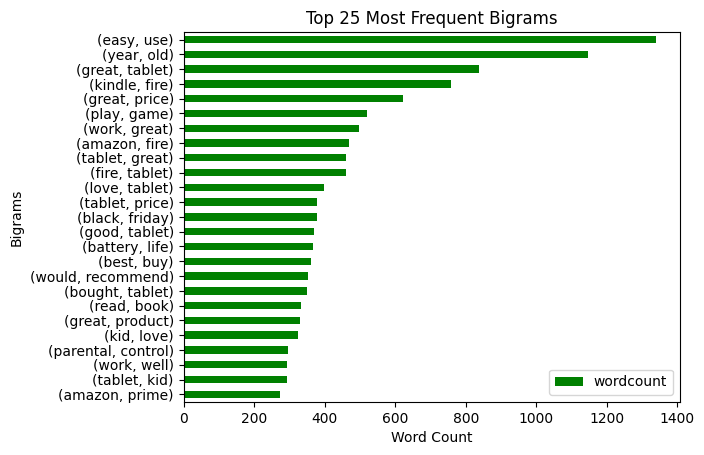

In [ ]:
# Function to plot a horizontal bar chart
def horizontal_bar_chart(data, color):
    data.plot(kind='barh', x='word', y='wordcount', color=color)
    plt.xlabel('Word Count')
    plt.ylabel('Bigrams')
    plt.title('Top 25 Most Frequent Bigrams')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    plt.show()

# Plot the top 25 most frequent bigrams
horizontal_bar_chart(fd_sorted.head(25), 'green')

B) **Extraction of Trigrams**

The Trigrams will have a look at the top 25 frequent 3 combinations of words.

In [ ]:
# Function to generate n-grams
from collections import defaultdict
from nltk import ngrams # Import the ngrams function

# Define a function to generate n-grams
def generate_ngrams(clean_text, n):
    words = clean_text.split()
    return list(ngrams(words, n))

# Initialize a defaultdict for frequency counts
freq_dict = defaultdict(int)

# Calculate trigram frequency
for sent in data["clean_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
# Sort the frequency dictionary and create a DataFrame
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
print(fd_sorted.head(25))

                              word  wordcount
0              (bought, year, old)        177
1           (amazon, fire, tablet)        170
2           (great, tablet, price)        140
3                (year, old, love)        136
4            (google, play, store)        128
5              (tablet, easy, use)        127
6              (tablet, year, old)        118
7              (cant, beat, price)        112
8                (love, easy, use)        108
9                 (year, old, son)        102
10          (tablet, great, price)        100
11            (amazon, app, store)         99
12           (year, old, daughter)         97
13         (great, little, tablet)         96
14              (easy, use, great)         94
15            (great, tablet, kid)         90
16      (would, recommend, anyone)         67
17               (cant, go, wrong)         65
18  (would, definitely, recommend)         63
19            (love, kindle, fire)         61
20             (play, game, watch)

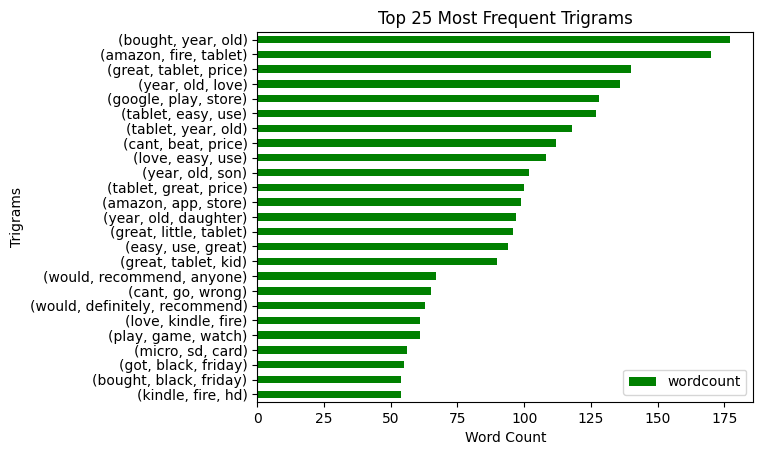

In [ ]:
# Function to plot a horizontal bar chart
def horizontal_bar_chart(data, color):
    data.plot(kind='barh', x='word', y='wordcount', color=color)
    plt.xlabel('Word Count')
    plt.ylabel('Trigrams')
    plt.title('Top 25 Most Frequent Trigrams')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    plt.show()

# Plot the top 25 most frequent Trigrams
horizontal_bar_chart(fd_sorted.head(25), 'green')

###**Word Vectorization**

Methods used are:

1. **TF-IDF Vectorization**

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer transforms the text into a weighted matrix, where each term's importance is adjusted based on its frequency in the document and across all documents.

2. **Count Vectorization**

The Count Vectorizer to converts the text into a matrix of token counts, representing the raw frequency of each term.


**The result**:

Two matrices one with TF-IDF weights and another with raw token counts, each representing the reviews in a numerical format.

###A)**CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

clean_text = data['clean_text']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the clean_text column
X_count = vectorizer.fit_transform(clean_text)

# Print the array representation of the features
print(X_count.toarray()[1:])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Extracted the first 10 feature names

In [ ]:
# CountVectorizer
count_vec = CountVectorizer()
# Convert the Pandas Series to a list of strings
X_count = count_vec.fit_transform(clean_text.tolist())
print('CountVectorizer:')
print(count_vec.get_feature_names_out()[:10], '\n')


CountVectorizer:
['aa' 'abandon' 'abattery' 'abc' 'abcmouse' 'abcmousecom' 'abd' 'ability'
 'abilty' 'abit'] 



###B)**TF-IDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the corpus into a TF-IDF matrix
X_tfidf = vectorizer.fit_transform(clean_text)

# Print the TF-IDF matrix as a dense array
print(X_tfidf.toarray(), "\n")

# Print the feature names
print("Feature names:")
print(vectorizer.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Feature names:
['aa' 'abandon' 'abattery' ... 'zoom' 'zoomed' 'zooming']


###**Word Embedding Techniques (Word2Vec and FastText):**

We used advanced word embedding techniques to capture the semantic meaning of words in the reviews.

* **Word2Vec**: This technique uses a neural network model to learn vector representations of words based on their context in the corpus. We trained a Word2Vec model on our tokenized text data to obtain word vectors.

* **FastText:** Similar to Word2Vec, but it also considers subword information, making it better at handling rare and out-of-vocabulary words. We trained a FastText model to generate word vectors that include subword information.

###A)**Word2Vec**

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the text
sentences = [word_tokenize(doc.lower()) for doc in data['clean_text']]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = model.wv

# Get the combined matrix of word vectors
wordvec_matrix = word_vectors.vectors
print(wordvec_matrix)

[[-1.5068863e-01  6.3428171e-02  3.2916546e-01 ... -4.2446473e-01
   2.0283884e-01  6.1780144e-02]
 [ 1.4219648e-01  8.1820148e-01 -2.8016311e-01 ... -2.3264991e-01
   1.7516573e-01  1.7222626e-02]
 [-1.0281669e-01  4.9936223e-01  3.1769815e-01 ...  1.6484964e-01
   5.6852096e-01 -4.4910184e-01]
 ...
 [ 5.3491048e-03  1.9520946e-02  4.1149007e-03 ... -1.2361633e-02
   7.4075339e-03 -1.1383339e-02]
 [ 6.6161565e-03  1.4459368e-02  1.1421006e-02 ... -9.6442336e-03
   1.5093631e-02  7.3117362e-03]
 [ 1.8699267e-03  5.7075284e-03  3.5455732e-03 ... -1.8550504e-02
   1.0572807e-03  6.0640514e-04]]


###B) **FastText**

In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

# Tokenize the text
sentences = [word_tokenize(doc.lower()) for doc in data['clean_text']]

# Train FastText model
model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = model.wv

# Get the combined matrix of word vectors
fasttext_matrix = word_vectors.vectors
print(fasttext_matrix)


[[-0.92287266  0.14702174 -0.79065204 ... -0.13592456  0.3070964
   0.14550059]
 [-1.2960643  -0.11427958 -0.99751246 ...  0.23815921  0.97278845
   0.26405624]
 [-1.1532832   0.02814879 -0.8235454  ...  0.03156775  0.03897018
   0.0059722 ]
 ...
 [-0.16125236 -0.02818967 -0.47869277 ... -0.15219589 -0.01365738
   0.31606424]
 [-0.16397035 -0.05725078 -0.47975725 ... -0.13754298 -0.01615353
   0.32184893]
 [-0.12186304 -0.10724075 -0.5856966  ... -0.19292068 -0.12182381
   0.45474076]]


# **Modeling**

The model features used in these project are going to be
* **LSTM Model**
* **Simple RNN Model**

###A) **LSTM Modeling**



In [ ]:
#import libraries for deep learning

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Split the data into training and testing data
X = clean_text.values
y = data['labeled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Words, length and embedding values to be used for tokenization
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [ ]:
# Tokenization of the splitted data
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
#Padding of the splitted data
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
#defining the lstm model

model_lstm = Sequential()
model_lstm.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))

In [ ]:
# compile the model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Initiate early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001, restore_best_weights=True)

In [ ]:
#define the epochs and batch_size to be used
epochs = 10
batch_size = 64

In [ ]:
#train the model
history = model_lstm.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

Epoch 1/10
211/211 [==============================] - 150s 696ms/step - loss: 0.4603 - accuracy: 0.8043 - val_loss: 0.3221 - val_accuracy: 0.8833
Epoch 2/10
211/211 [==============================] - 145s 689ms/step - loss: 0.2135 - accuracy: 0.9199 - val_loss: 0.2974 - val_accuracy: 0.8925
Epoch 3/10
211/211 [==============================] - 167s 792ms/step - loss: 0.1577 - accuracy: 0.9440 - val_loss: 0.2821 - val_accuracy: 0.9026
Epoch 4/10
211/211 [==============================] - 170s 804ms/step - loss: 0.1224 - accuracy: 0.9588 - val_loss: 0.3246 - val_accuracy: 0.8904
Epoch 5/10
211/211 [==============================] - 148s 702ms/step - loss: 0.0977 - accuracy: 0.9675 - val_loss: 0.2917 - val_accuracy: 0.8981
Epoch 6/10
211/211 [==============================] - 140s 663ms/step - loss: 0.0770 - accuracy: 0.9748 - val_loss: 0.3333 - val_accuracy: 0.9058


In [ ]:
#Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test_padded, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')

106/106 - 7s - loss: 0.2821 - accuracy: 0.9026 - 7s/epoch - 63ms/step
Test Accuracy: 0.9025762677192688


The Lstm Model, test accuracy is 0.902 which indicates a good performance to this model.

###B)**Simple RNN Model**

In [ ]:
#import Libraries
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

# Define the model
model_rnn = Sequential()
model_rnn.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model_rnn.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(3, activation='softmax'))

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_rnn.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_rnn.evaluate(X_test_padded, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
211/211 [==============================] - 49s 226ms/step - loss: 0.5991 - accuracy: 0.7399 - val_loss: 0.5317 - val_accuracy: 0.7569
Epoch 2/10
211/211 [==============================] - 45s 215ms/step - loss: 0.4306 - accuracy: 0.8029 - val_loss: 0.4181 - val_accuracy: 0.8134
Epoch 3/10
211/211 [==============================] - 45s 211ms/step - loss: 0.2548 - accuracy: 0.9010 - val_loss: 0.3675 - val_accuracy: 0.8659
Epoch 4/10
211/211 [==============================] - 45s 215ms/step - loss: 0.2020 - accuracy: 0.9291 - val_loss: 0.5072 - val_accuracy: 0.8282
Epoch 5/10
211/211 [==============================] - 44s 210ms/step - loss: 0.1763 - accuracy: 0.9385 - val_loss: 0.4282 - val_accuracy: 0.8605
Epoch 6/10
211/211 [==============================] - 47s 224ms/step - loss: 0.1496 - accuracy: 0.9486 - val_loss: 0.5561 - val_accuracy: 0.8365
106/106 - 3s - loss: 0.3675 - accuracy: 0.8659 - 3s/epoch - 24ms/step
Test Accuracy: 0.8658572435379028


The Test accuracy of the simple RNN model is at 0.865 which is lower than the LSTM model performance at 0.90

# **Model Evaluation**

###**Roc/AUC Curve Comparison for LSTM and Simple RNN models**

We will proceed check on ROC and AUC metrics for both models to see the performance.

The models are evaluated using accuracy scores, and ROC curves to ensure they accurately classify the sentiment of the reviews.



106/106 [==============================] - 2s 19ms/step


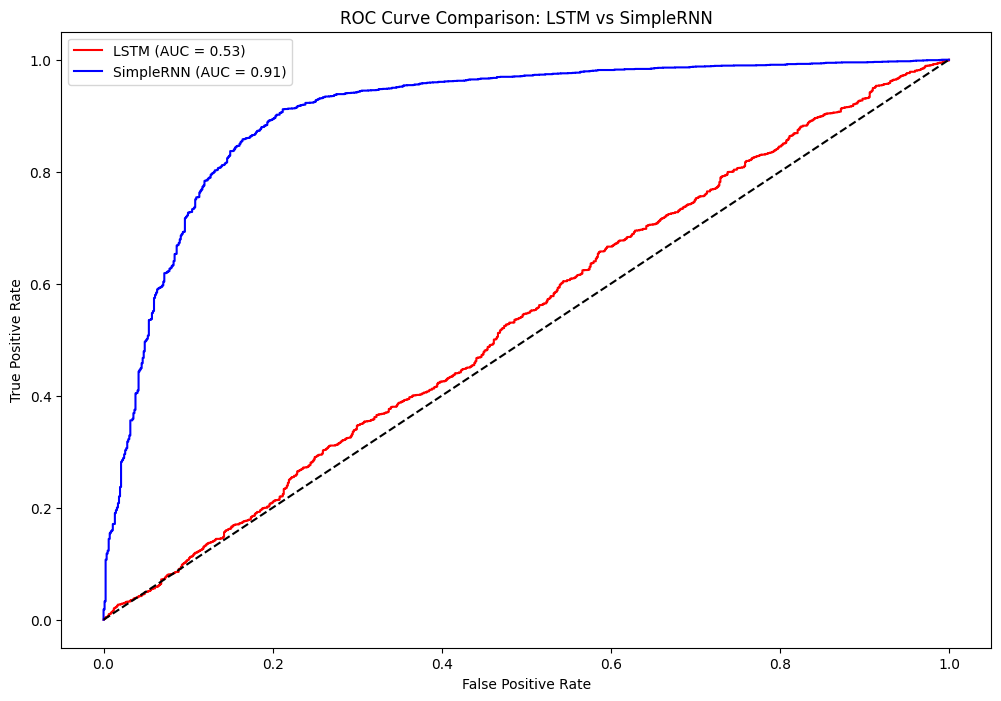

In [ ]:
#import libraries
from sklearn import metrics
import matplotlib.pyplot as plt

# Get predicted probabilities for both models
y_pred_prob_lstm = model_lstm.predict(X_test_padded)
y_pred_prob_rnn = model_rnn.predict(X_test_padded)

# Calculate ROC curves and AUC metrics
fpr_lstm, tpr_lstm, thresholds_lstm = metrics.roc_curve(y_test, y_pred_prob_lstm[:, 1])
fpr_rnn, tpr_rnn, thresholds_rnn = metrics.roc_curve(y_test, y_pred_prob_rnn[:, 1])
auc_lstm = metrics.auc(fpr_lstm, tpr_lstm)
auc_rnn = metrics.auc(fpr_rnn, tpr_rnn)

# Plot ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_lstm, tpr_lstm, color='red', label='LSTM (AUC = %0.2f)' % auc_lstm)
plt.plot(fpr_rnn, tpr_rnn, color='blue', label='SimpleRNN (AUC = %0.2f)' % auc_rnn)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: LSTM vs SimpleRNN')
plt.legend()
plt.show()


* **SimpleRNN Model**: With an AUC of 0.91, the SimpleRNN model is performing much better than the LSTM model in distinguishing between the classes. It has a high true positive rate and a low false positive rate across various thresholds.

* **LSTM Model**: With an AUC of 0.53, the LSTM model is only marginally better than random guessing. This indicates that the LSTM model is not very effective for this particular task or dataset.**bold text**



###**Model Hyperparameter Tuning**

From the ROC_AUC curve simple RNN has a better AUC score than the LSTM, will proceed to continue with tuning the model to get a better accuracy.

In [ ]:
!pip install keras-tuner
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from kerastuner.tuners import RandomSearch
import tensorflow as tf


# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

    # Tune the number of units in the SimpleRNN layer
    rnn_units = hp.Int('units', min_value=50, max_value=200, step=50)
    model.add(SimpleRNN(rnn_units, dropout=hp.Float('dropout', 0.1, 0.5, step=0.1), recurrent_dropout=hp.Float('recurrent_dropout', 0.1, 0.5, step=0.1)))

    # Tune the learning rate for the optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

    return model

# Set up the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='hyperparam_tuning',
    project_name='rnn_tuning'
)

# Run the hyperparameter search
tuner.search(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the SimpleRNN layer is {best_hps.get('units')},
the optimal dropout rate is {best_hps.get('dropout')}, the optimal recurrent dropout rate is {best_hps.get('recurrent_dropout')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it
model_rnn = tuner.hypermodel.build(best_hps)
history = model_rnn.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_rnn.evaluate(X_test_padded, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')

Reloading Tuner from hyperparam_tuning/rnn_tuning/tuner0.json

The hyperparameter search is complete. The optimal number of units in the SimpleRNN layer is 200,
the optimal dropout rate is 0.4, the optimal recurrent dropout rate is 0.1,
and the optimal learning rate for the optimizer is 0.0001.

Epoch 1/10
211/211 [==============================] - 111s 512ms/step - loss: 0.5913 - accuracy: 0.7501 - val_loss: 0.5641 - val_accuracy: 0.7569
Epoch 2/10
211/211 [==============================] - 89s 420ms/step - loss: 0.5528 - accuracy: 0.7664 - val_loss: 0.5502 - val_accuracy: 0.7569
Epoch 3/10
211/211 [==============================] - 91s 431ms/step - loss: 0.5414 - accuracy: 0.7663 - val_loss: 0.5469 - val_accuracy: 0.7569
Epoch 4/10
211/211 [==============================] - 87s 412ms/step - loss: 0.5276 - accuracy: 0.7664 - val_loss: 0.5002 - val_accuracy: 0.7569
Epoch 5/10
211/211 [==============================] - 91s 429ms/step - loss: 0.4330 - accuracy: 0.8014 - val_loss: 0.4213 

The Model tuning for simple RNN Accuracy score is 0.8694 which has no huge difference from the model before tuning which was 0.8658.

The score is slightly higher than our objective of achieving 0.85 accurracy score. The model is therefore is satisfactory.


# **Reccommendations and Conclusion**

* **Customer feedback**: The overall feedback is positive. It's therefore, essential to continue monitoring and encouraging positive customer experiences. This can be achieved through maintaining product quality, enhancing customer service, and soliciting feedback from satisfied customers to bolster positive reviews.

* **Product preference**: We recommend investing in the most preferred product categories by expanding product lines, improving features based on customer feedback, and maintaining competitive pricing to sustain positive customer sentiment.

* **Trend Analysis**: Periodic spikes or dips may indicate specific product launches, updates, or marketing campaigns. Consider correlating these fluctuations with internal events to identify factors influencing customer sentiment and adjust strategies accordingly.

* **User Experience**: We recommend encouraging customers to leave detailed and informative reviews by incentivizing feedback or providing clear guidelines on what constitutes a helpful review. This will help stakeholders to highlight these reviews prominently to enhance trust and credibility among prospective buyers.

* **This sentiment analysis system** provides a scalable and automated way to interpret vast amounts of customer feedback. By leveraging NLP and deep learning, businesses can gain valuable insights to improve their products and services, ultimately enhancing customer satisfact